In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

import seaborn as sns


# Recursos de NLTK
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


In [8]:
#!pip install pandas openpyxl

In [9]:
path_file_codebook = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\Feminism_Influencers_Spain\data\Codebook - Feminism and Anti-feminism.xlsx"

df_codebook = pd.read_excel(path_file_codebook)

df_codebook.head()

,ID,Code,Definition,Survey question / comments,Category,Sub-category,Feminism Stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues


In [10]:
df_codebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          48 non-null     int64 
 1   Code                        48 non-null     object
 2   Definition                  29 non-null     object
 3   Survey question / comments  21 non-null     object
 4   Category                    48 non-null     object
 5   Sub-category                28 non-null     object
 6   Feminism Stance             48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [11]:
df_codebook.shape

(48, 7)

In [12]:
# Convert column names to lowercase and replace characters

df_codebook.columns = df_codebook.columns.str.lower()
df_codebook.columns = df_codebook.columns.str.replace(' / ', '_').str.replace(' ', '_').str.replace('-', '_')
df_codebook = df_codebook.rename(columns={'survey_question_comments': 'comments'})


df_codebook.head(2)

,id,code,definition,comments,category,sub_category,feminism_stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism


In [13]:
df_codebook.describe(exclude='number').T.sort_values(by = 'freq', ascending=False)

,count,unique,top,freq
category,48,5,Non-related content,19
sub_category,28,3,Latent,17
feminism_stance,48,12,Content niche,17
code,48,48,Equating feminism and machismo,1
definition,29,29,"They do not deny discrimination against women,...",1
comments,21,21,"""Tan peligroso es el machismo como el feminism...",1


In [14]:
df_codebook['category'].unique()

array(['Antifeminism', 'Neutral', 'Feminism', 'Non-related content',
       'No content'], dtype=object)

In [15]:
df_codebook[df_codebook['sub_category'] == 'Latent'][['category', 'sub_category', 'feminism_stance']]


,category,sub_category,feminism_stance
2,Antifeminism,Latent,Opposing feminist issues
3,Antifeminism,Latent,Opposing feminist issues
4,Antifeminism,Latent,Opposing feminist issues
5,Antifeminism,Latent,Opposing feminist issues
6,Antifeminism,Latent,Opposing feminist issues
10,Antifeminism,Latent,Opposing feminist issues
11,Antifeminism,Latent,Opposing feminist issues
12,Antifeminism,Latent,Opposing feminist issues
13,Antifeminism,Latent,Content expressing opinions or behaviors of a ...
16,Antifeminism,Latent,Opposing feminist issues


In [16]:
df_codebook[df_codebook['feminism_stance'] == 'Content niche']
#[['category', 'sub_category', 'feminism_stance']]

,id,code,definition,comments,category,sub_category,feminism_stance
28,30,Videogames,NaN,NaN,Non-related content,NaN,Content niche
29,31,Beauty,NaN,NaN,Non-related content,NaN,Content niche
30,32,Lifestyle (IRL),NaN,NaN,Non-related content,NaN,Content niche
31,33,Fitness,NaN,NaN,Non-related content,NaN,Content niche
32,34,Movies and TV Shows,NaN,NaN,Non-related content,NaN,Content niche
33,35,Music,NaN,NaN,Non-related content,NaN,Content niche
34,36,Humour,NaN,NaN,Non-related content,NaN,Content niche
35,37,Animals,NaN,NaN,Non-related content,NaN,Content niche
36,38,Cooking,NaN,NaN,Non-related content,NaN,Content niche
37,39,Coaching,NaN,NaN,Non-related content,NaN,Content niche


To provide visual insights, I decided to unify the following two labels into one: *'Content expressing opinions or behaviors of a sexist or anti-feminist nature, but the content does not directly address the feminism-antifeminism debate,'* and *'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti-feminist nature, but the content does not directly address the feminism-antifeminism debate.'*  The new label is **'Sexist Content without Debate'**

In [17]:
# New DataFrame with unify labels

visual_df_codebook = df_codebook.copy()  

visual_df_codebook['feminism_stance'] = visual_df_codebook['feminism_stance'].replace({
    'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n':
    'Sexist Content without Debate',    
    'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.': 
    'Sexist Content without Debate'
})

C:\Users\Celeste\AppData\Local\Temp\ipykernel_15832\4117329768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage',


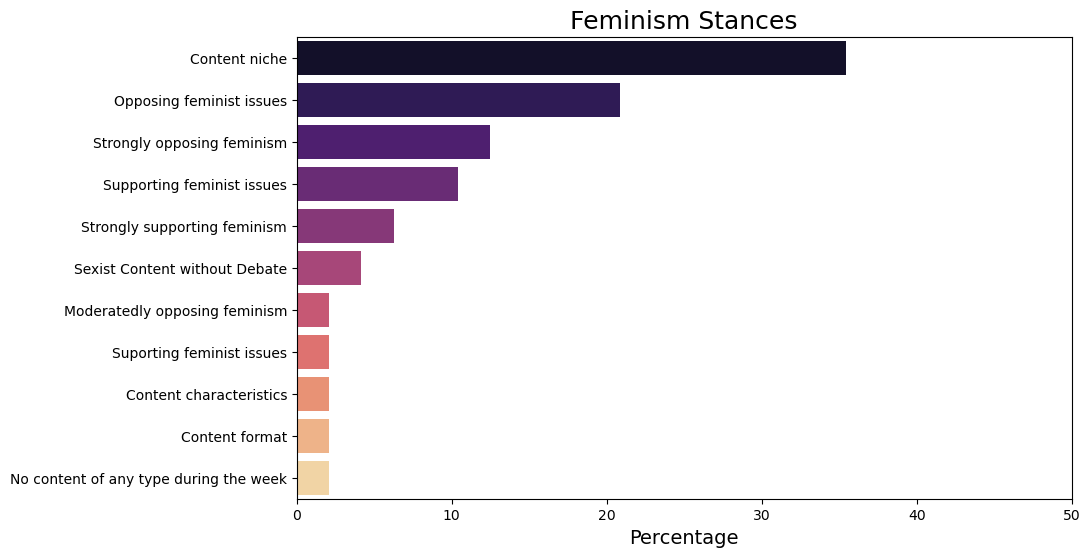

In [40]:
# Porcentajes
feminism_stance_counts = visual_df_codebook['feminism_stance'].value_counts(normalize=True) * 100
feminism_stance_counts = feminism_stance_counts.reset_index()
feminism_stance_counts.columns = ['feminism_stance', 'percentage']

plt.figure(figsize=(10, 6))
sns.barplot(x='percentage', 
            y='feminism_stance', 
            data=feminism_stance_counts,
            palette='magma')

# Añadir títulos y etiquetas
plt.title("Feminism Stances" , fontsize=18)
plt.xlabel("Percentage", fontsize=14)
plt.ylabel("")  
plt.xlim(0, 50)  

plt.show()


Preprocessing

In [19]:
df_codebook['category'].notna().value_counts()
df_codebook['category'].value_counts()

#note: not balanced! 

category
Non-related content    19
Antifeminism           18
Feminism                9
Neutral                 1
No content              1
Name: count, dtype: int64

In [20]:
nan_count = df_codebook['comments'].isna().sum()
non_nan_count = df_codebook['comments'].notna().sum()

print(f"Valores NaN: {nan_count}")
print(f"Valores no NaN: {non_nan_count}")

Valores NaN: 27
Valores no NaN: 21


In [21]:
# I took this next idea from: 

# https://www.kaggle.com/code/ankumagawa/sentimental-analysis-using-naive-bayes-classifier#3.-SENTIMENTAL-ANALYSIS:

#df_codebook['feminism_stance'].unique()

In [22]:
# Unify values in column 'feminism_stance'
df_codebook['feminism_stance'] = df_codebook['feminism_stance'].replace('Suporting feminist issues', 'Supporting feminist issues')

(-0.5, 799.5, 399.5, -0.5)

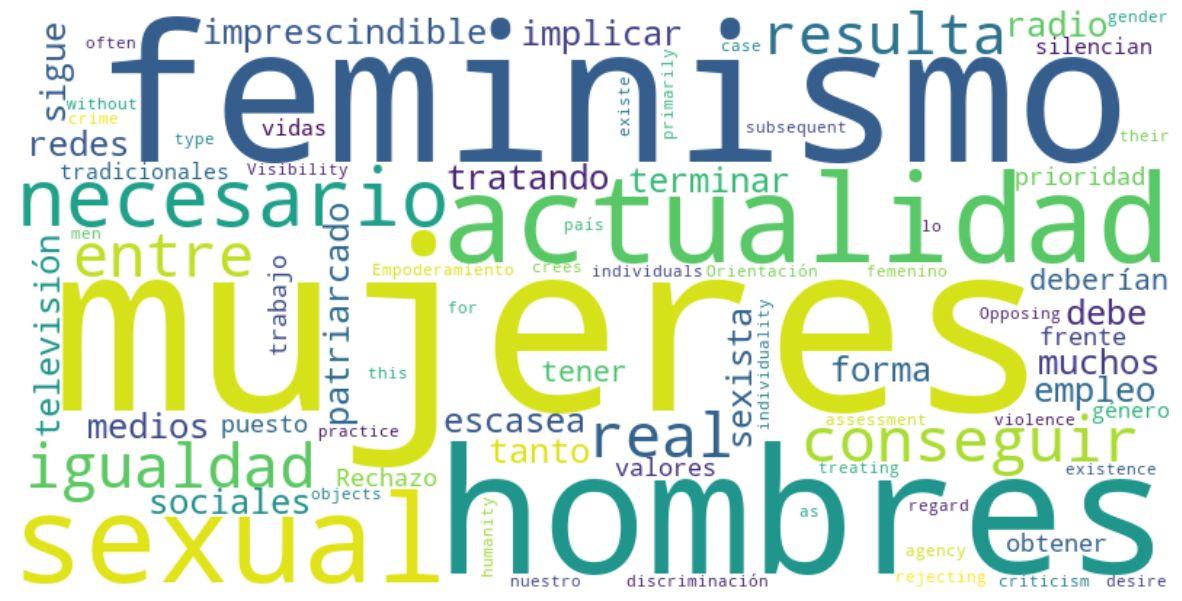

In [41]:
# Define positive stances
positive_stances = ['Strongly supporting feminism', 'Supporting feminist issues']

# Join comments for positive stances
text = " ".join(i for i in df_codebook[df_codebook['feminism_stance'].isin(positive_stances)]['comments'])

stopwords = set(['the', 'or', 'by','and','y', 'o', 'que', 'de', 'la', 'el', 'El', 'en', 'a', 'los', 'las', 'por', 'un', 'una', \
                 'con', 'su', 'se', 'del', 'es', 'no', 'para', 'más', 'este', 'esto', 'como','este', 'P22', 'tan',\
                      'donde', 'cuando', 'que', 'quien', 'mi', 'me', 'te', 'su', 'mismo', 'también', 'ser', 'hay', 'of'])

wordcloud = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(text)

# Plott the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# What are people discussing? Topics with significant impact. Still a reality, still a patriarchy.

(-0.5, 799.5, 399.5, -0.5)

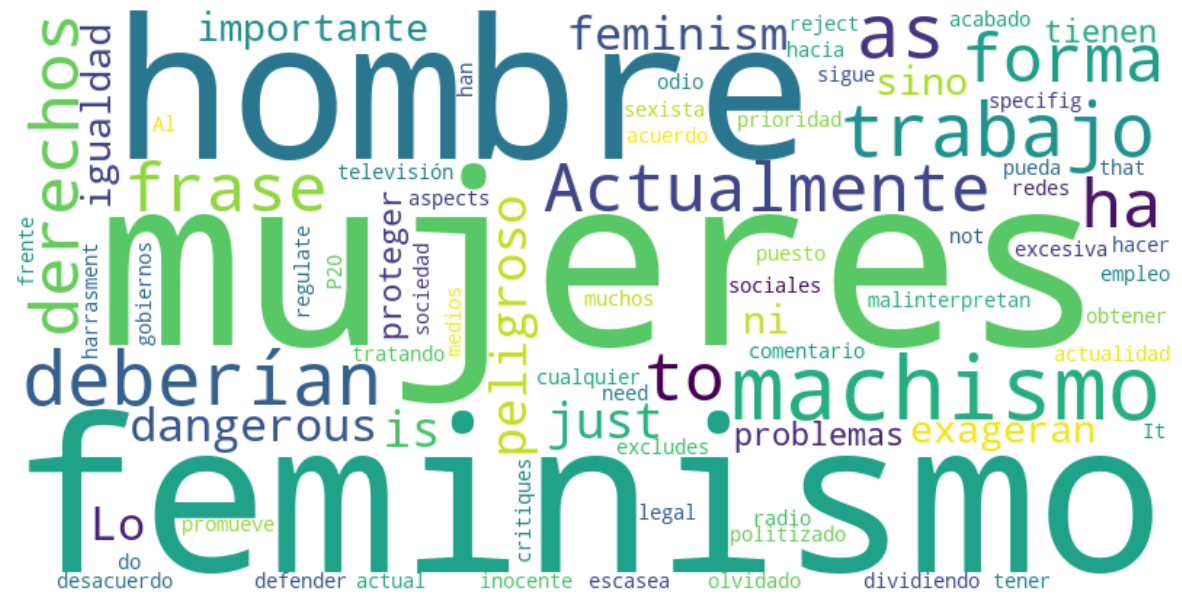

In [42]:
negative_stances = ['Strongly opposing feminism', 'Moderatedly opposing feminism', 'Opposing feminist issues',\
                    'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n',\
                    'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.']

text = " ".join(i for i in df_codebook[df_codebook['feminism_stance'].isin(negative_stances)]['comments'] if pd.notna(i))

wordcloud = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [25]:
#Tokenization

import spacy
spacy_nlp = spacy.load("es_core_news_sm")

In [26]:
df_sentiment_analysis = df_codebook[['id', 'comments', 'category', 'sub_category']].copy()

df_sentiment_analysis.head(3)

,id,comments,category,sub_category
0,1,"""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit
1,2,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit
2,3,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent


In [27]:
df_sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            48 non-null     int64 
 1   comments      21 non-null     object
 2   category      48 non-null     object
 3   sub_category  28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [44]:
# Eliminar filas donde 'comments' es NaN
df_sentiment_analysis = df_sentiment_analysis.dropna(subset=['comments'])

df_sentiment_analysis.shape

(21, 4)

In [47]:
# Def regex
REPLACE_NO_SPACE = re.compile(r"[.;:!\'¿?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)")

def clean(comments):

    #remove special characters
    comments = re.sub(REPLACE_NO_SPACE, "", comments)
    comments = re.sub(REPLACE_WITH_SPACE, " ", comments)

    #preprocess with spaCy
    doc = spacy_nlp(comments)

    lemmas = []
    # entities = []
    
    for token in doc:
        if not token.is_punct and not token.is_space and not token.is_stop:
            lemmas.append(token.lemma_.lower()) 

 # for ent in doc.ents:
    #     entities.append((ent.text, ent.label_))
    
    return lemmas #, entities

Attributes in spaCy
- is_punct: A boolean attribute that indicates whether the token is a punctuation mark.
- pos_: The part of speech (POS) of the token, such as noun, verb, adjective, etc.
- text: The original text of the token as it appears in the input text.

In [48]:
# Sanity check
text = df_sentiment_analysis['comments'][3]

print('before cleaning: ', text)
print('\n')
print('after cleaning: ', clean(text))

before cleaning:  "Los hombres deberían proteger a las mujeres "


after cleaning:  ['hombre', 'deber', 'proteger', 'mujer']


In [49]:
df_sentiment_analysis['tokenized_comments'] = df_sentiment_analysis.comments.apply(clean)

In [50]:
vectoriser = TfidfVectorizer(analyzer=clean)
data_tfidf = vectoriser.fit_transform(df_sentiment_analysis.comments)

In [51]:
# Save the vector space in a list
vector_space = vectoriser.get_feature_names_out()

In [52]:
len(vector_space) #the vectoriser has found 162 unique features (words)

121

## Sentiment Analysis

### Hugging face 🤗

In [56]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="es")

c:\Users\Celeste\anaconda3\envs\data-science\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [57]:
def predict_sentiment(comment):
    
    sentiment = analyzer.predict(comment).output #without output we get all the "probas"
    
    if sentiment == 'POS':
        return 'POSITIVE'
    elif sentiment == 'NEG':
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

In [59]:
df_sentiment_analysis['sentiment'] = df_sentiment_analysis['comments'].apply(predict_sentiment)

df_sentiment_analysis.head(3)

,id,comments,category,sub_category,tokenized_comments,sentiment
0,1,"""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,"[peligroso, machismo, feminismo, machismo, is,...",NEGATIVE
1,2,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,"[importante, feminismo, machismo, igualdad]",NEUTRAL
2,3,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,"[mujer, exagerar, problema, trabajo]",NEGATIVE


# Visual insights

C:\Users\Celeste\AppData\Local\Temp\ipykernel_15832\4145161283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


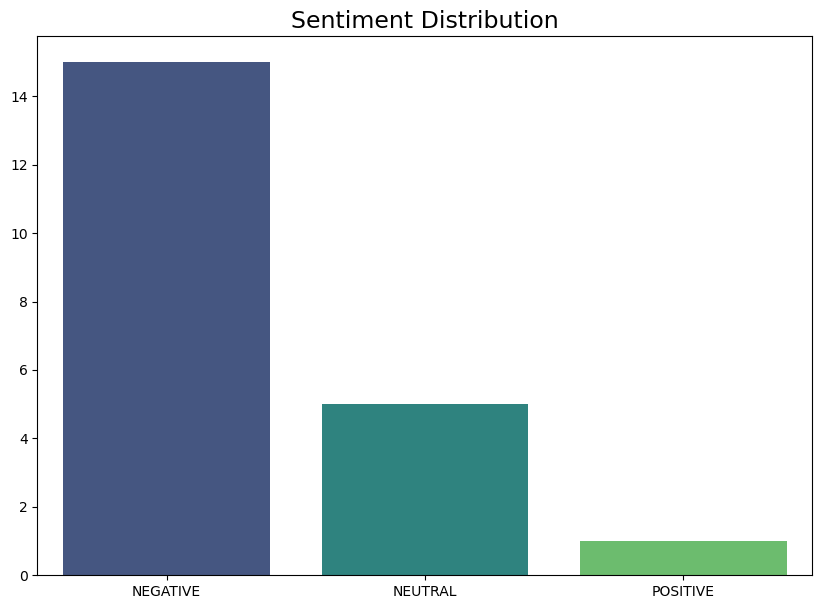

In [64]:
sentiment_counts = df_sentiment_analysis['sentiment'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Sentiment Distribution', fontsize=17)
plt.xlabel('')
plt.ylabel('')

plt.show()

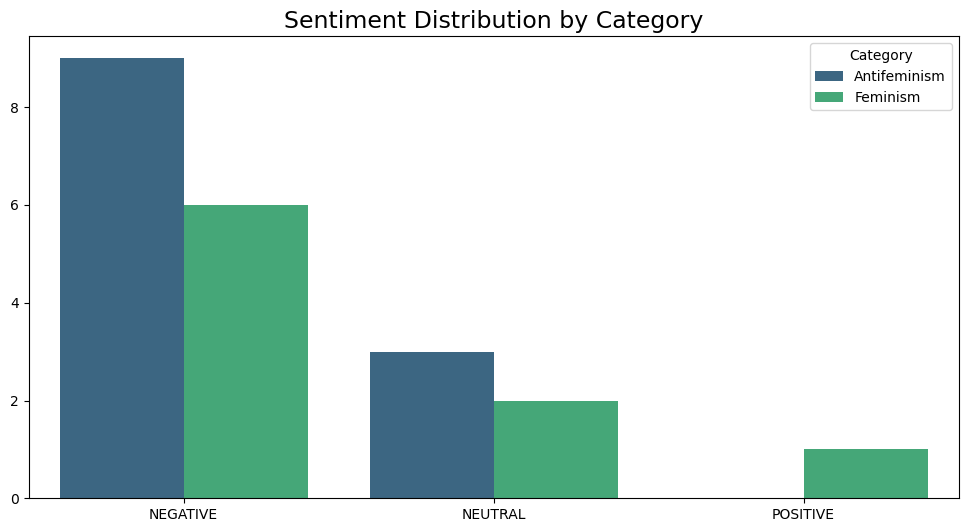

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sentiment_analysis, x='sentiment', hue='category', palette='viridis')


plt.title('Sentiment Distribution by Category', fontsize= 17)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Category')


plt.show()